# Diabetes Classification Pipeline

## Name: Ali Badran
## Task 3
## Link:

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure (mm Hg),768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skin fold thickness (mm),768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin (mu U/ml),768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index (weight in kg/(height in m)^2),768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class variable,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
# Define the expected ranges
ranges = {
    "Number of times pregnant": (0, 17),
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test": (0, 199),
    "Diastolic blood pressure (mm Hg)": (0, 122),
    "Triceps skin fold thickness (mm)": (0, 99),
    "2-Hour serum insulin (mu U/ml)": (0, 846),
    "Body mass index (weight in kg/(height in m)^2)": (0, 67.1),
    "Diabetes pedigree function": (0.078, 2.42),
    "Age (years)": (21, 81),
    "Class variable": (0, 1)
}

def check_ranges(df, ranges_dict):
    for col, (low, high) in ranges_dict.items():
        invalid = df[(df[col] < low) | (df[col] > high)]
        if not invalid.empty:
            print(f"⚠ Column '{col}' has {len(invalid)} values outside range ({low} - {high}).")
            print(invalid[[col]].head())
        else:
            print(f"✅ Column '{col}' is within range.")


check_ranges(df, ranges)


✅ Column 'Number of times pregnant' is within range.
✅ Column 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test' is within range.
✅ Column 'Diastolic blood pressure (mm Hg)' is within range.
✅ Column 'Triceps skin fold thickness (mm)' is within range.
✅ Column '2-Hour serum insulin (mu U/ml)' is within range.
✅ Column 'Body mass index (weight in kg/(height in m)^2)' is within range.
✅ Column 'Diabetes pedigree function' is within range.
✅ Column 'Age (years)' is within range.
✅ Column 'Class variable' is within range.


In [6]:
# Check rows that have zero values
def check_zero_values(df):
    zero_counts = (df == 0).sum()
    for col, count in zero_counts.items():
        if count > 0:
            print(f"⚠ Column '{col}' has {count} zero values.")
        else:
            print(f"✅ Column '{col}' has no zero values.")

check_zero_values(df)


⚠ Column 'Number of times pregnant' has 111 zero values.
⚠ Column 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test' has 5 zero values.
⚠ Column 'Diastolic blood pressure (mm Hg)' has 35 zero values.
⚠ Column 'Triceps skin fold thickness (mm)' has 227 zero values.
⚠ Column '2-Hour serum insulin (mu U/ml)' has 374 zero values.
⚠ Column 'Body mass index (weight in kg/(height in m)^2)' has 11 zero values.
✅ Column 'Diabetes pedigree function' has no zero values.
✅ Column 'Age (years)' has no zero values.
⚠ Column 'Class variable' has 500 zero values.


The following columns contain zero values that are **biologically impossible** and should be treated as missing data:

| Feature | Reason | Impact |
|---------|--------|--------|
| 🩸 **Plasma glucose concentration** | Cannot be zero in a living human | Critical biomarker |
| 💓 **Diastolic blood pressure** | Cannot be zero (except cardiac arrest) | Vital sign |
| 📏 **Triceps skin fold thickness** | Physical measurement cannot be zero | Body composition |
| 💉 **2-Hour serum insulin** | Cannot be zero under test conditions | Metabolic indicator |
| ⚖️ **Body mass index (BMI)** | Mathematical impossibility (weight/height²) | Health metric |

### ✅ Valid Zero Values (Meaningful Data)
These columns can legitimately contain zero values:

- 🤰 **Number of times pregnant** - Valid for nulliparous women
- 🧬 **Diabetes pedigree function** - Valid genetic risk score
- 👶 **Age** - Not applicable (minimum age is 21 in dataset)
- 🎯 **Class variable** - Binary outcome (0 = non-diabetic)

---
💡 **Next Step**: Replace invalid zeros with appropriate imputation methods (mean, median, or predictive modeling)

In [7]:
cols_with_invalid_zero = [
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)"
]

df[cols_with_invalid_zero] = df[cols_with_invalid_zero].replace(0, np.nan)

# showing the count of Nans
print(df.isnull().sum())

Number of times pregnant                                                      0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      5
Diastolic blood pressure (mm Hg)                                             35
Triceps skin fold thickness (mm)                                            227
2-Hour serum insulin (mu U/ml)                                              374
Body mass index (weight in kg/(height in m)^2)                               11
Diabetes pedigree function                                                    0
Age (years)                                                                   0
Class variable                                                                0
dtype: int64


In [8]:
from sklearn.impute import KNNImputer

# Use KNN imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
df[cols_with_invalid_zero] = imputer.fit_transform(df[cols_with_invalid_zero])

print("✅ Missing values imputed using KNN imputation")
df.info()

✅ Missing values imputed using KNN imputation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    float64
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    float64
 3   Triceps skin fold thickness (mm)                                          768 non-null    float64
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    float64
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree fun

In [9]:
check_zero_values(df)


⚠ Column 'Number of times pregnant' has 111 zero values.
✅ Column 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test' has no zero values.
✅ Column 'Diastolic blood pressure (mm Hg)' has no zero values.
✅ Column 'Triceps skin fold thickness (mm)' has no zero values.
✅ Column '2-Hour serum insulin (mu U/ml)' has no zero values.
✅ Column 'Body mass index (weight in kg/(height in m)^2)' has no zero values.
✅ Column 'Diabetes pedigree function' has no zero values.
✅ Column 'Age (years)' has no zero values.
⚠ Column 'Class variable' has 500 zero values.


In [10]:
def detect_outliers_iqr(df, columns):
    """
    Detect outliers in given columns of a DataFrame using the IQR method.
    Returns a dictionary {column: outlier_info}.
    """
    outliers_dict = {}
    
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get outlier values
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_values = df[col][outlier_mask]
        
        if not outlier_values.empty:
            outliers_dict[col] = {
                "lower_bound": lower_bound,
                "upper_bound": upper_bound,
                "count": len(outlier_values),
                "values": outlier_values.tolist(),
                "rows": df[outlier_mask]
            }
    
    return outliers_dict


# Example usage:
columns_to_check = [
    "Number of times pregnant",
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)",
    "Diabetes pedigree function",
    "Age (years)"
]

outliers_found = detect_outliers_iqr(df, columns_to_check)

# Print results
for col, info in outliers_found.items():
    print(f"\n📌 Column: {col}")
    print(f"   Lower bound: {info['lower_bound']:.2f}")
    print(f"   Upper bound: {info['upper_bound']:.2f}")
    print(f"   Outliers detected: {info['count']}")
    print(f"   Outlier values: {info['values'][:10]}")  # Show first 10 outlier values
    if len(info['values']) > 10:
        print(f"   ... and {len(info['values']) - 10} more values")
    if len(info['values']) < 5:
        print(info['rows'].head())


📌 Column: Number of times pregnant
   Lower bound: -6.50
   Upper bound: 13.50
   Outliers detected: 4
   Outlier values: [15, 17, 14, 14]
     Number of times pregnant  \
88                         15   
159                        17   
298                        14   
455                        14   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
88                                               136.0                          
159                                              163.0                          
298                                              100.0                          
455                                              175.0                          

     Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
88                               70.0                              32.0   
159                              72.0                              41.0   
298                              78.0                          

In [11]:
# Remove physiologically impossible values for BP
df = df[df["Diastolic blood pressure (mm Hg)"] >= 40]

# Define thresholds for capping
thresholds = {
    "Number of times pregnant": (0, 13),
    "Diastolic blood pressure (mm Hg)": (40, 110),
    "Triceps skin fold thickness (mm)": (0, 60),
    "Body mass index (weight in kg/(height in m)^2)": (10, 50),
    "Diabetes pedigree function": (0, 2.5)
}

# Apply capping (Winsorization)
for col, (low, high) in thresholds.items():
    df[col] = np.clip(df[col], low, high)


In [12]:
outliers_found = detect_outliers_iqr(df, columns_to_check)

# Print results
for col, info in outliers_found.items():
    print(f"\n📌 Column: {col}")
    print(f"   Lower bound: {info['lower_bound']:.2f}")
    print(f"   Upper bound: {info['upper_bound']:.2f}")
    print(f"   Outliers detected: {info['count']}")
    print(f"   Outlier values: {info['values'][:10]}")  # Show first 10 outlier values
    if len(info['values']) > 10:
        print(f"   ... and {len(info['values']) - 10} more values")
    if len(info['values']) < 5:
        print(info['rows'].head())


📌 Column: Diastolic blood pressure (mm Hg)
   Lower bound: 40.00
   Upper bound: 104.00
   Outliers detected: 10
   Outlier values: [110.0, 108.0, 110.0, 110.0, 108.0, 110.0, 106.0, 106.0, 106.0, 110.0]

📌 Column: Triceps skin fold thickness (mm)
   Lower bound: 2.50
   Upper bound: 54.50
   Outliers detected: 4
   Outlier values: [60.0, 56.0, 60.0, 60.0]
     Number of times pregnant  \
57                          0   
120                         0   
445                         0   
579                         2   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
57                                               100.0                          
120                                              162.0                          
445                                              180.0                          
579                                              197.0                          

     Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (m

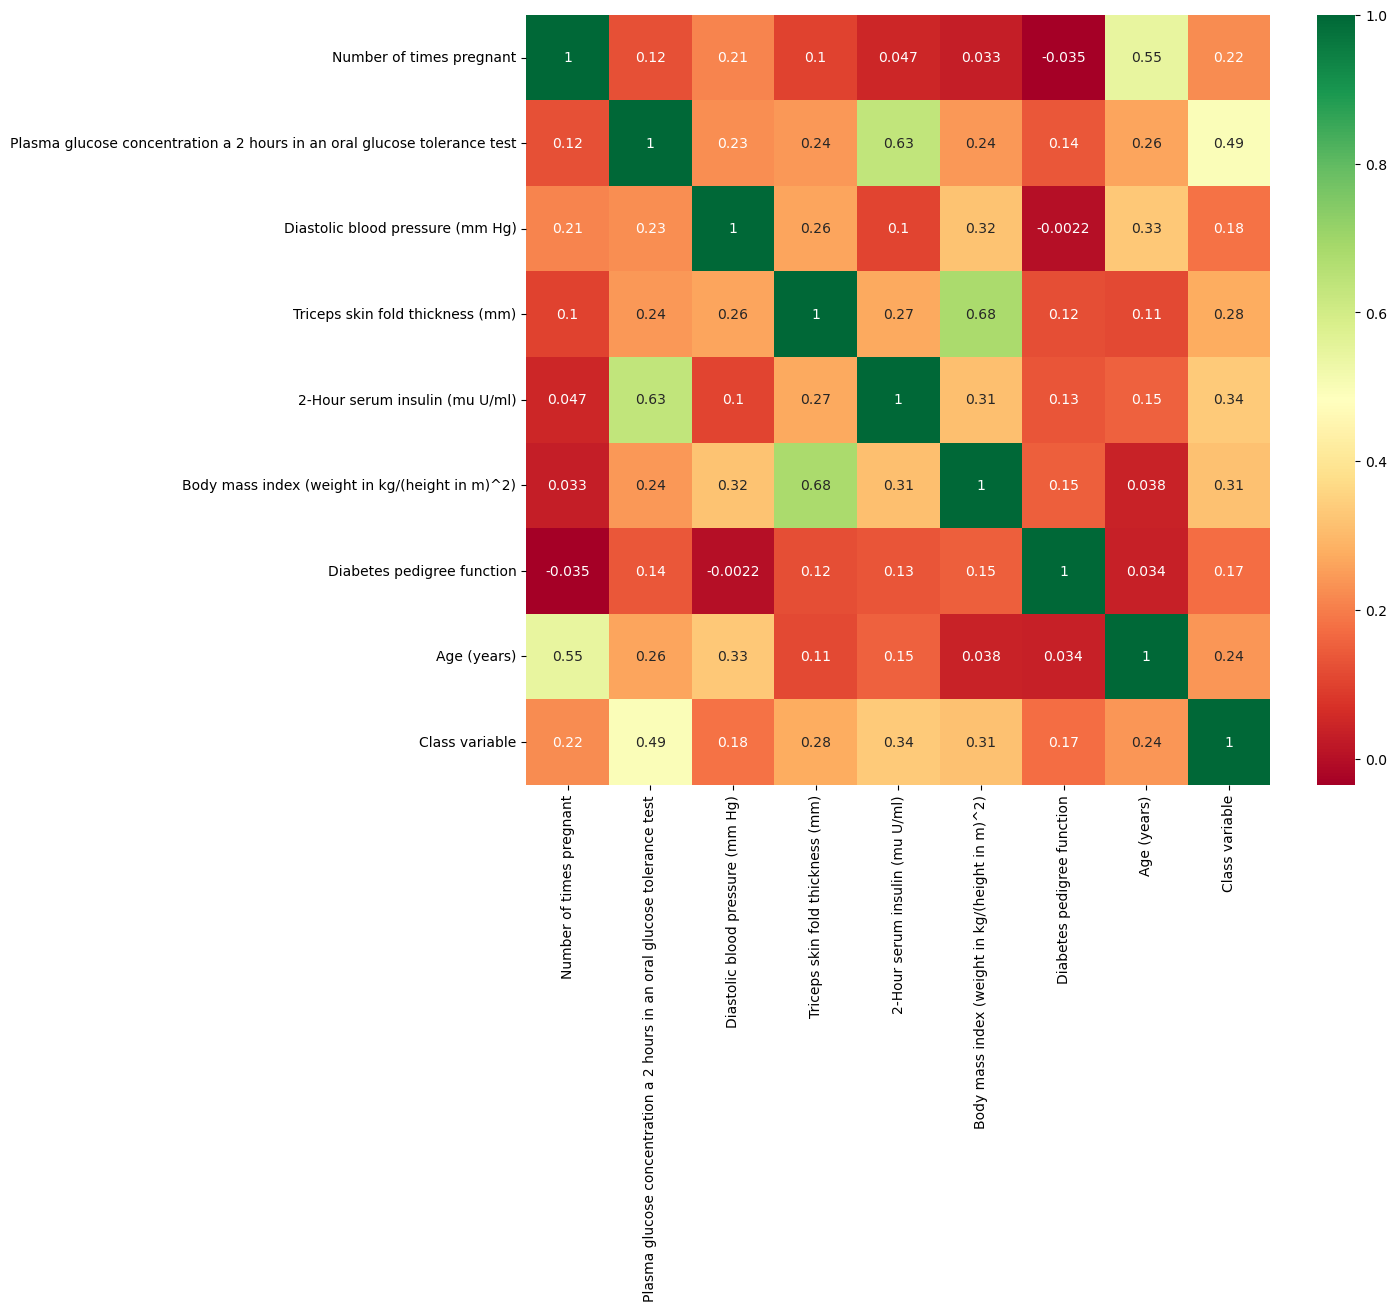

In [13]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop(columns=['Class variable'])
y = df['Class variable']

# First: Separate out the test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second: Split train into train & validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val
)

scaler = StandardScaler()
# Fit on training only
X_train_scaled = scaler.fit_transform(X_train)

# Transform val and test using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models_params = {
    "SVM": (SVC(), {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "C": [0.1, 1, 10]
    }),
    "Decision Tree": (DecisionTreeClassifier(), {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10]
    }),
    "Random Forest": (RandomForestClassifier(), {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10]
    }),
    "XGBoost": (XGBClassifier(eval_metric='logloss', use_label_encoder=False), {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7]
    }),
    "k-NN": (KNeighborsClassifier(), {
        "n_neighbors": [1, 3, 5, 7]
    }),
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        "C": [0.1, 1, 10]
    })
}


  MODEL: SVM
Best Params: {'C': 10, 'kernel': 'linear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.63      0.42      0.50        53

    accuracy                           0.71       153
   macro avg       0.68      0.64      0.65       153
weighted avg       0.70      0.71      0.69       153

Best Params: {'C': 10, 'kernel': 'linear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.63      0.42      0.50        53

    accuracy                           0.71       153
   macro avg       0.68      0.64      0.65       153
weighted avg       0.70      0.71      0.69       153



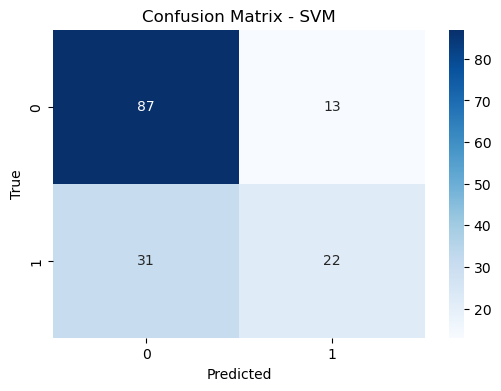


  MODEL: Decision Tree
Best Params: {'max_depth': 5, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.61      0.38      0.47        53

    accuracy                           0.70       153
   macro avg       0.67      0.62      0.63       153
weighted avg       0.68      0.70      0.68       153

Best Params: {'max_depth': 5, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       100
           1       0.61      0.38      0.47        53

    accuracy                           0.70       153
   macro avg       0.67      0.62      0.63       153
weighted avg       0.68      0.70      0.68       153



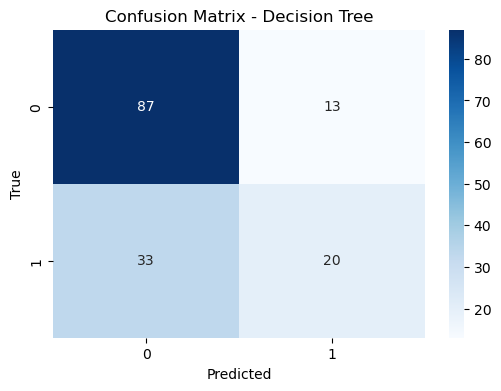


  MODEL: Random Forest
Best Params: {'max_depth': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.58      0.47      0.52        53

    accuracy                           0.70       153
   macro avg       0.66      0.65      0.65       153
weighted avg       0.69      0.70      0.69       153

Best Params: {'max_depth': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.58      0.47      0.52        53

    accuracy                           0.70       153
   macro avg       0.66      0.65      0.65       153
weighted avg       0.69      0.70      0.69       153



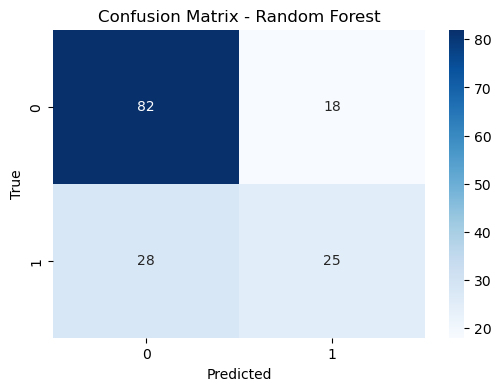


  MODEL: XGBoost


c:\Users\AliBadran\miniconda3\envs\Task_1\lib\site-packages\xgboost\core.py:158: UserWarning: [03:18:45] WARNING: D:\bld\xgboost-split_1737531311373\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'max_depth': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.58      0.47      0.52        53

    accuracy                           0.70       153
   macro avg       0.66      0.65      0.65       153
weighted avg       0.69      0.70      0.69       153



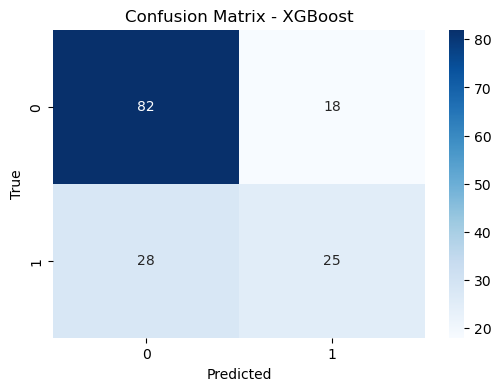


  MODEL: k-NN
Best Params: {'n_neighbors': 7}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.61      0.57      0.59        53

    accuracy                           0.73       153
   macro avg       0.70      0.69      0.69       153
weighted avg       0.72      0.73      0.72       153

Best Params: {'n_neighbors': 7}

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.61      0.57      0.59        53

    accuracy                           0.73       153
   macro avg       0.70      0.69      0.69       153
weighted avg       0.72      0.73      0.72       153



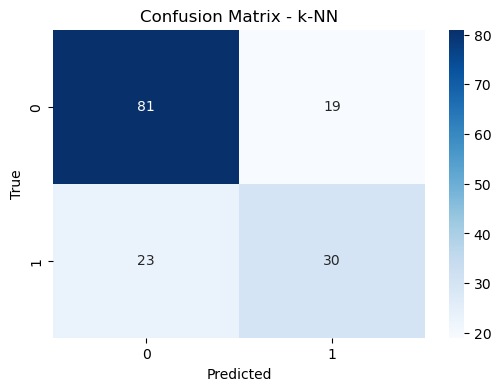


  MODEL: Logistic Regression
Best Params: {'C': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.66      0.43      0.52        53

    accuracy                           0.73       153
   macro avg       0.70      0.66      0.67       153
weighted avg       0.72      0.73      0.71       153

Best Params: {'C': 10}

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.66      0.43      0.52        53

    accuracy                           0.73       153
   macro avg       0.70      0.66      0.67       153
weighted avg       0.72      0.73      0.71       153



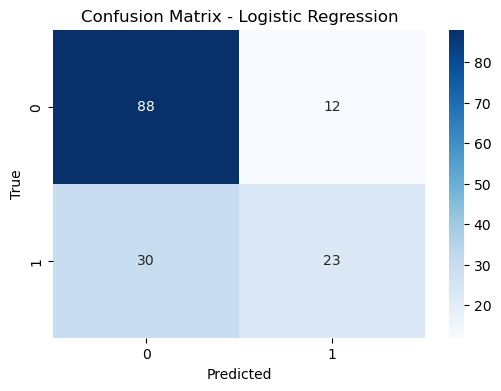


SUMMARY OF MODEL PERFORMANCE
                     Accuracy  Precision    Recall  F1-score
Model                                                       
SVM                  0.712418   0.699628  0.712418  0.694879
Decision Tree        0.699346   0.683799  0.699346  0.678053
Random Forest        0.699346   0.688624  0.699346  0.690846
XGBoost              0.699346   0.688624  0.699346  0.690846
k-NN                 0.725490   0.721135  0.725490  0.722799
Logistic Regression  0.725490   0.715064  0.725490  0.708748


C:\Users\AliBadran\AppData\Local\Temp\ipykernel_13720\3323545690.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y="Accuracy", data=results_df, palette="viridis")


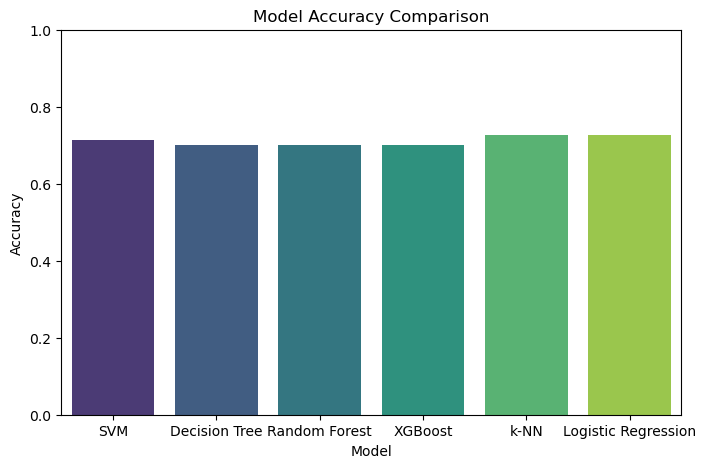

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


results = []

for name, (model, params) in models_params.items():
    print("\n" + "="*50)
    print(f"  MODEL: {name}")
    print("="*50)
    
    # Grid Search
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    print(f"Best Params: {grid.best_params_}")
    
    # Predictions
    y_pred = best_model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    # Append results for later summary table
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1
    })
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                xticklabels=set(y_test), yticklabels=set(y_test))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Summary table
results_df = pd.DataFrame(results).set_index("Model")
print("\n" + "="*50)
print("SUMMARY OF MODEL PERFORMANCE")
print("="*50)
print(results_df)

# Bar plot of Accuracy for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=results_df.index, y="Accuracy", data=results_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

## Conclusion

Across all evaluated models, performance was relatively close, with **k-NN** and **Logistic Regression** achieving the highest accuracy (≈72.5%), slightly outperforming SVM (71.2%) and the tree-based models (~69.9%).  
 
The **k-NN classifier (n_neighbors=7)** demonstrated the most balanced performance, achieving high accuracy and strong precision/recall trade-offs across both classes. **Logistic Regression (C=10)** also performed competitively, with particularly strong recall for the majority class (class 0).  

Tree-based methods (Decision Tree, Random Forest, XGBoost) provided interpretable models but showed reduced recall for the minority class (class 1), indicating potential challenges with class imbalance. SVM (linear kernel) performed robustly overall, but recall for class 1 remained modest.

**Key takeaways:**
- **Best overall accuracy:** k-NN and Logistic Regression (~72.5%).
- **Best minority class handling:** Slight edge to k-NN.
